# Unlocking the Black Box: How to Visualize Data Science Project Pipeline with Yellowbrick Library

No matter whether you are a novice data scientist or a well-seasoned and established professional working in the field for a long time, you most likely faced a challenge of interpreting results generated at any stage of the data science pipeline, be it data ingestion or wrangling, feature selection or model evaluation. This issue becomes even more prominent when the need arises to present interim findings to a group of stakeholders, clients, etc. How do you deal in that case with the long arrays of numbers, scientific notations and formulas which tell a story of your data set? That's when visualization library like Yellowbrick becomes an essential tool in the arsenal of any data scientist and helps to undertake that endevour by providing interpretable and comprehensive visualization means for any stage of a project pipeline.

### Introduction

In this post we will explain how to integrate visualization step into each stage of your project without a need to create customized and time-consuming charts, while getting the benefit of drawing necessary insights into the data you are working with. Because, let's agree on that, unlike computers, human eye perceives graphical represenation of information way better, than it does with bits and digits. Yellowbrick machine learning visualization library serves just that purpose - to "create publication-ready figures and interactive data explorations while still allowing developers fine-grain control of figures. For users, Yellowbrick can help evaluate the performance, stability, and predictive value of machine learning models and assist in diagnosing problems throughout the machine learning workflow" ( http://www.scikit-yb.org/en/latest/about.html ).

For the purpose of this exercise we will be using a dataset from UCI Machine Learning Repository on Absenteeism at Work ( https://archive.ics.uci.edu/ml/machine-learning-databases/00445/ ). This data set contains a mix of continuous, binary and hierarchical features, along with continuous target representing a number of work hours an employee has been absent for from work. Such a variety in data makes for an interesting wrangling, feature selection and model evaluation task, results of which we will make sure to visualize along the way.

To begin, we will need to pip install and import Yellowbrick Pyhton library. To do that, simply run the following command from your command line: 
$ pip install yellowbrick

Once that's done, let's import Yellowbrick along with other essential packages, libraries and user-preference set up into the Jupyter Notebook.

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
from cycler import cycler
import matplotlib.style
import matplotlib as mpl
mpl.style.use('seaborn-white')
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.cluster import KMeans
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import KFold
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier, RandomTreesEmbedding, GradientBoostingClassifier
import warnings
warnings.filterwarnings("ignore")
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from yellowbrick.features import Rank1D
from yellowbrick.features import Rank2D
from yellowbrick.classifier import ClassBalance
from yellowbrick.model_selection import LearningCurve
from yellowbrick.model_selection import ValidationCurve
from yellowbrick.classifier import ClassPredictionError
from yellowbrick.classifier import ClassificationReport
from yellowbrick.features.importances import FeatureImportances

### Data Ingestion and Wrangling

Now we are ready to proceed with downloading a zipped archive containing the dataset directly from the UCI Machine Learning Repository and extracting the data file. To perform this step, we will be using the urllib.request module which helps with opening URLs (mostly HTTP) in a complex world.

In [2]:
import urllib.request

print('Beginning file download...')

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00445/Absenteeism_at_work_AAA.zip'  

urllib.request.urlretrieve( url ## , Specify a path to folder you want the archive to be stored in, e.g. '/Users/Yara/Downloads/Absenteeism_at_work_AAA.zip')   
                          )

Beginning file download...


('/Users/Yara/Downloads/Absenteeism_at_work.zip',
 <http.client.HTTPMessage at 0x20445c48550>)

Unzip the archive and extract a CSV data file which we will be using. Zipfile module does that flawlessly.

In [4]:
import zipfile
         
fantasy_zip = zipfile.ZipFile('C:\\Users\\Yara\\Downloads\\Absenteeism_at_work_AAA.zip')
fantasy_zip.extract('Absenteeism_at_work.csv', 'C:\\Users\\Yara\\Downloads')
 
fantasy_zip.close()

Load the data and place it in the same folder as your Python code.

In [5]:
dataset = pd.read_csv('C:\\Users\\Yara\\Downloads\\Absenteeism_at_work.csv', 'Absenteeism_at_work.csv', delimiter=';')

Let's take a look at a couple of randomly selected rows from the loaded data set.

In [6]:
dataset.sample(10)

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
208,28,19,5,3,3,225,26,9,28,378.884,...,0,1,1,0,0,2,69,169,24,8
540,10,22,11,3,4,361,52,3,28,268.519,...,0,1,1,1,0,4,80,172,27,8
732,10,22,7,4,1,361,52,3,28,264.604,...,0,1,1,1,0,4,80,172,27,8
524,28,13,10,5,4,225,26,9,28,284.853,...,0,1,1,0,0,2,69,169,24,1
629,10,19,3,2,2,361,52,3,28,222.196,...,0,1,1,1,0,4,80,172,27,8
277,19,0,9,3,1,291,50,12,32,294.217,...,1,1,0,1,0,0,65,169,23,0
136,11,22,1,5,2,289,36,13,33,308.593,...,0,1,2,1,0,1,90,172,30,3
609,25,25,2,2,2,235,16,8,32,264.249,...,0,3,0,0,0,0,75,178,25,3
460,22,23,7,5,1,179,26,9,30,230.290,...,0,3,0,0,0,0,56,171,19,2
294,33,0,10,6,4,248,25,14,47,265.017,...,1,1,2,0,0,1,86,165,32,0


In [7]:
dataset.ID.count()

740

As we can see, selected dataset contains 740 instances, each instance representing an employed individual. Features provided in the dataset are those considered to be related to the number of hours an employee was absent from work (target). For the purpose of this exercise, we will subjectively group all instances into 3 categories, thus, converting continuous target into categorical. To identify appropriate bins for the target, let's look at the min, max and mean values.

In [8]:
# Getting basic statistical information for the target
print(dataset.loc[:, 'Absenteeism time in hours'].mean())
print(dataset.loc[:, 'Absenteeism time in hours'].min())
print(dataset.loc[:, 'Absenteeism time in hours'].max())

6.924324324324324
0
120


If approximately 7 hours of absence is an average value accross our dataset, it makes sense to group records in the following manner:

1) Low rate of absence (Low), if 'Absenteeism time in hours' value is < 6;

2) Medium rate of absence (Medium), if 'Absenteeism time in hours' value is between 6 and 30;

3) High rate of absence (High), if 'Absenteeism time in hours' value is > 30.

Upon grouping, we will be further exploring data and selecting relevant features from the dataset in order to predict an absentee category for the instances in the test portion of the data.

In [9]:
dataset['Absenteeism time in hours'] = np.where(dataset['Absenteeism time in hours'] < 6, 1, dataset['Absenteeism time in hours'])
dataset['Absenteeism time in hours'] = np.where(dataset['Absenteeism time in hours'].between(6, 30), 2, dataset['Absenteeism time in hours'])
dataset['Absenteeism time in hours'] = np.where(dataset['Absenteeism time in hours'] > 30, 3, dataset['Absenteeism time in hours'])

In [10]:
#Let's look at the data now!
dataset.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,1
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,1
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,1
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,1
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,1


Once the target is taken care of, time to look at the features. Those of them storing unique identifiers and / or data which might 'leak' information to the model, should be dropped from the data set. For instance, 'Reason for absence' feature stores the information 'from the future' since it will not be available in the real world business scenario when running the model on a new set of data. Therefore, it is highly correlated with the target.

In [11]:
dataset = dataset.drop(['ID', 'Reason for absence'], axis=1)

In [12]:
dataset.columns

Index(['Month of absence', 'Day of the week', 'Seasons',
       'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

We are now left with the set of features and a target to use in a machine learning model of our choice. So, let's separate features from the target, and split our dataset into a matrix of features (X) and an array of target values (y).

In [13]:
features = ['Month of absence', 'Day of the week', 'Seasons',
       'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index']
target = ['Absenteeism time in hours']

In [14]:
X = dataset.drop(['Absenteeism time in hours'], axis=1)
y = dataset.loc[:, 'Absenteeism time in hours']

In [15]:
# Setting up some visual preferences prior to visualizing data
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

### Exploratory Analysis and Feature Selection

Whenever one deals with a categorical target, it is important to remember to test the data set for class imbalance issue. Machine learning models struggle with performing well on imbalanced data where one class is overrepresented, while the other one is underrepresented. While such data sets are representative of the real life, e.g. no company will have majority or even half of its employees missing work on a massive scale, they need to be adjusted for the machine learning purposes, to improve algorithms' ability to pick up patterns present in that data.

And to check for the potential class imbalance in our data, we will use Class Balance Visualizer from Yellowbrick.

 Low:  468
 Medium:  244
 High:  28


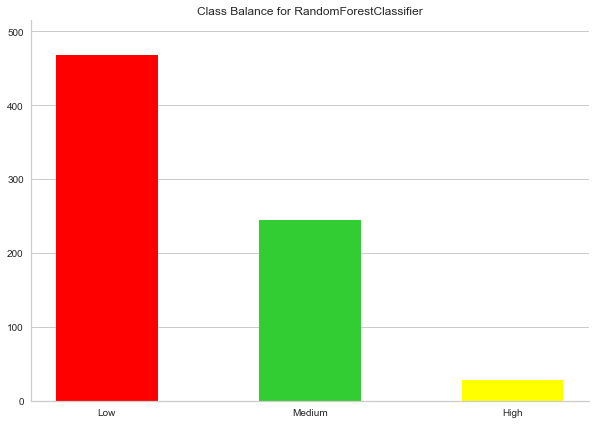

In [16]:
# Calculating population breakdown by target category
Target = y.value_counts()
print(color.BOLD, 'Low:', color.END, Target[1])
print(color.BOLD, 'Medium:', color.END, Target[2])
print(color.BOLD, 'High:', color.END, Target[3])

# Creating class labels
classes = ["Low", "Medium", "High"]

# Instantiate the classification model and visualizer
mpl.rcParams['axes.prop_cycle'] = cycler('color', ['red', 'limegreen', 'yellow'])
forest = RandomForestClassifier()
fig, ax = plt.subplots(figsize=(10, 7))
visualizer = ClassBalance(forest, classes=classes, ax=ax)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(axis='x')

visualizer.fit(X, y)  # Fit the training data to the visualizer
visualizer.score(X, y)  # Evaluate the model on the test data
g = visualizer.show()

There is an obvious class imbalance here, therefore, we can expect the model to have difficulties learning the pattern for Medium and High categories, unless data resampling is performed or class weight parameter applied within selected model if chosen algorithm allows it.

With that being said, let's proceed with assessing feature importance and selecting those which will be used further in a model of our choice. Yellowbrick library provides a number of convenient vizualizers to perform feature analysis, and we will use a couple of them for demonstration purposes, as well as to make sure that consistent results are returned when different methods are applied.

Rank 1D visualizer utilizes Shapiro-Wilk algorithm that takes into account only a single feature at a time and assesses the normality of the distribution of instances with respect to the feature. Let's see how it works!

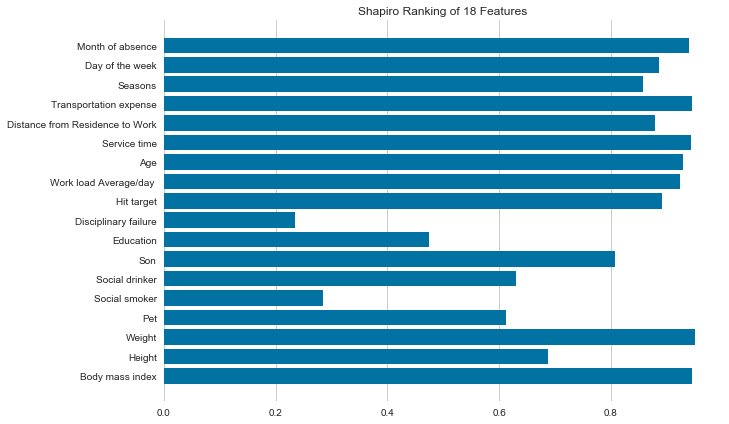

In [17]:
# Creating 1D visualizer with the Sharpiro feature ranking algorithm
fig, ax = plt.subplots(figsize=(10, 7))
visualizer = Rank1D(features=features, ax=ax, algorithm='shapiro')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

visualizer.fit(X, y)
visualizer.transform(X)
visualizer.show()

Rank 2D Visualizer, in its turn, utilizes a ranking algorithm that takes into account pairs of features at a time. It provides an option for a user to select ranking algorithm of their choice. We are going to experiment with covariance and Pearson, and compare the results.

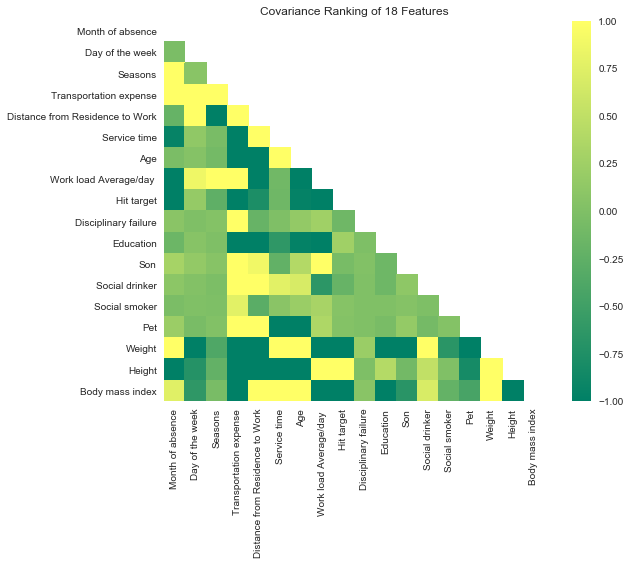

In [18]:
# Instantiate visualizer using covariance ranking algorithm
figsize=(10, 7)
fig, ax = plt.subplots(figsize=figsize)
visualizer = Rank2D(features=features, ax=ax, algorithm='covariance', colormap='summer')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

visualizer.fit(X, y)
visualizer.transform(X)
visualizer.show()

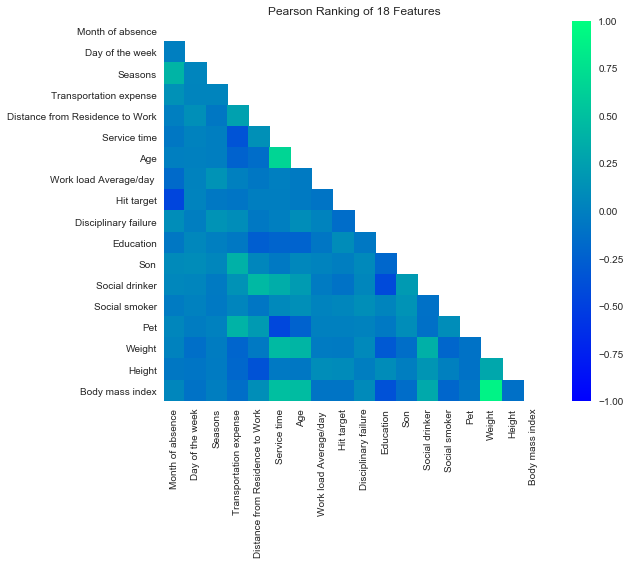

In [19]:
# Instantiate visualizer using Pearson ranking algorithm
figsize=(10, 7)
fig, ax = plt.subplots(figsize=figsize)
visualizer = Rank2D(features=features, algorithm='pearson', colormap='winter')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

visualizer.fit(X, y)
visualizer.transform(X)
visualizer.show()

Visual representation of feature correlation makes it much easier to spot pairs of features, which have high or low correlation coefficients. For instance, lighter colours on both plots indicate strong correlation between such pairs of features as 'Body mass index' and 'Weight'; 'Seasons' and 'Month of absence', etc.

Another way of estimating feature importance relative to the model is to rank them by feature_importances_ attribute when data is fitted to the model. The Yellowbrick Feature Importances visualizer utilizes this attribute to rank and plot features' relative importances. Let's look at how this approach works with Ridge, Lasso and ElasticNet models.

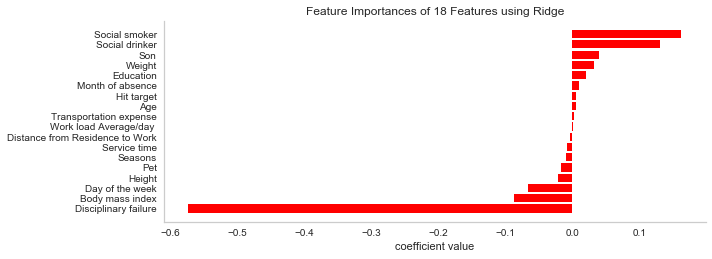

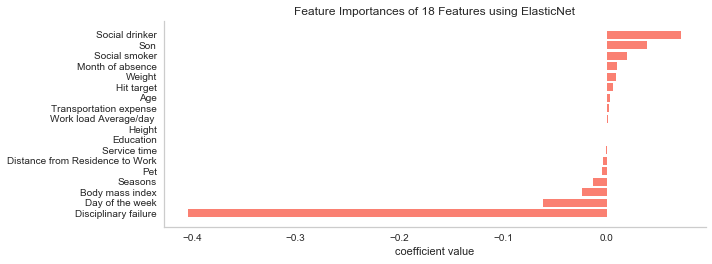

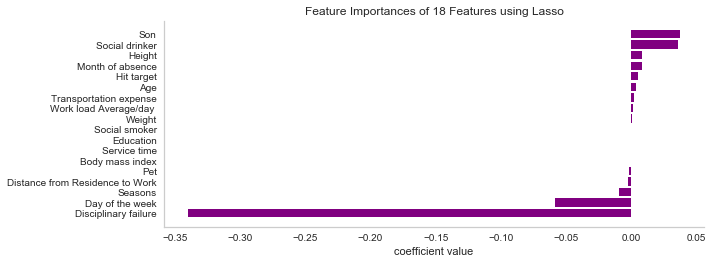

In [20]:
# Visualizing Ridge, Lasso and ElasticNet feature selection models side by side for comparison

# Ridge
# Create a new figure
mpl.rcParams['axes.prop_cycle'] = cycler('color', ['red'])
fig = plt.gcf()
fig.set_size_inches(10,10)
ax = plt.subplot(311)
labels = features
viz = FeatureImportances(Ridge(alpha=0.1), ax=ax, labels=labels, relative=False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(False)

# Fit and display
viz.fit(X, y)
viz.show()

# ElasticNet
# Create a new figure
mpl.rcParams['axes.prop_cycle'] = cycler('color', ['salmon'])
fig = plt.gcf()
fig.set_size_inches(10,10)
ax = plt.subplot(312)
labels = features
viz = FeatureImportances(ElasticNet(alpha=0.01), ax=ax, labels=labels, relative=False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(False)

# Fit and display
viz.fit(X, y)
viz.show()

# Lasso
# Create a new figure
mpl.rcParams['axes.prop_cycle'] = cycler('color', ['purple'])
fig = plt.gcf()
fig.set_size_inches(10,10)
ax = plt.subplot(313)
labels = features
viz = FeatureImportances(Lasso(alpha=0.01), ax=ax, labels=labels, relative=False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(False)

# Fit and display
viz.fit(X, y)
viz.show()

Having analyzed the output of all utilized visualizations (Shapiro algorithm, Pearson Correlation Ranking, Covariance Ranking, Lasso, Ridge and ElasticNet), we can now select a set of features which have meaningful coefficient values (positive or negative). These are the features to be kept in the model:

- Disciplinary failure
- Day of the week
- Seasons
- Distance from Residence to Work
- Number of children (Son)
- Social drinker
- Social smoker
- Height
- Weight
- BMI
- Pet
- Month of absence

Graphic visualization of the feature coefficients calculated in a number of different ways significantly simplifies feature selection process, making it more obvious, as it provides an easy way to visualy compare multiple values and consider only those which are statistically significant to the model.

Now let's drop features which didn't make it and proceed with creating models.

In [21]:
# Dropping features from X based on visual feature importance visualization
X = X.drop(['Transportation expense', 'Age', 'Transportation expense', 'Service time', 'Hit target', 'Education','Work load Average/day '], axis=1)

Some of the features which are going to be further utilized in the modeling stage, might be of a hierarchical type and require encoding. Let's look at the top couple of rows to see if we have any of those.

In [22]:
X.head()

,Month of absence,Day of the week,Seasons,Distance from Residence to Work,Disciplinary failure,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index
0,7,3,1,36,0,2,1,0,1,90,172,30
1,7,3,1,13,1,1,1,0,0,98,178,31
2,7,4,1,51,0,0,1,0,0,89,170,31
3,7,5,1,5,0,2,1,1,0,68,168,24
4,7,5,1,36,0,2,1,0,1,90,172,30


Looks like 'Month of absence', 'Day of week' and 'Seasons' are not binary. Therefore, we'll be using pandas get_dummies function to encode them.

In [23]:
# Encoding some categorical features
X = pd.get_dummies(data=X, columns=['Month of absence', 'Day of the week', 'Seasons'])

In [24]:
X.head()

,Distance from Residence to Work,Disciplinary failure,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Month of absence_0,...,Month of absence_12,Day of the week_2,Day of the week_3,Day of the week_4,Day of the week_5,Day of the week_6,Seasons_1,Seasons_2,Seasons_3,Seasons_4
0,36,0,2,1,0,1,90,172,30,0,...,0,0,1,0,0,0,1,0,0,0
1,13,1,1,1,0,0,98,178,31,0,...,0,0,1,0,0,0,1,0,0,0
2,51,0,0,1,0,0,89,170,31,0,...,0,0,0,1,0,0,1,0,0,0
3,5,0,2,1,1,0,68,168,24,0,...,0,0,0,0,1,0,1,0,0,0
4,36,0,2,1,0,1,90,172,30,0,...,0,0,0,0,1,0,1,0,0,0


In [25]:
print(X.columns)

Index(['Distance from Residence to Work', 'Disciplinary failure', 'Son',
       'Social drinker', 'Social smoker', 'Pet', 'Weight', 'Height',
       'Body mass index', 'Month of absence_0', 'Month of absence_1',
       'Month of absence_2', 'Month of absence_3', 'Month of absence_4',
       'Month of absence_5', 'Month of absence_6', 'Month of absence_7',
       'Month of absence_8', 'Month of absence_9', 'Month of absence_10',
       'Month of absence_11', 'Month of absence_12', 'Day of the week_2',
       'Day of the week_3', 'Day of the week_4', 'Day of the week_5',
       'Day of the week_6', 'Seasons_1', 'Seasons_2', 'Seasons_3',
       'Seasons_4'],
      dtype='object')


### Model Evaluation and Selection

Our matrix of features X is now ready to be fitted to a model, but first we need to split the data into train and test portions for further model validation.

In [26]:
# Perform 80/20 training/test split
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.20, random_state=42)

For the purpose of model evaluation and selection we will be using Yellowbrick's Classification Report Visualizer, which displays the precision, recall, F1, and support scores for the model. In order to support easier interpretation and problem detection, the report integrates numerical scores with a color-coded heatmap. All heatmaps are normalized, i.e. in the range from 0 to 1, to facilitate easy comparison of classification models across different classification reports.

In [27]:
# Creating a function to visualize estimators
def visual_model_selection(X, y, estimator):
    visualizer = ClassificationReport(estimator, classes=['Low', 'Medium', 'High'], cmap='PRGn')
    visualizer.fit(X, y)  
    visualizer.score(X, y)
    visualizer.show()  

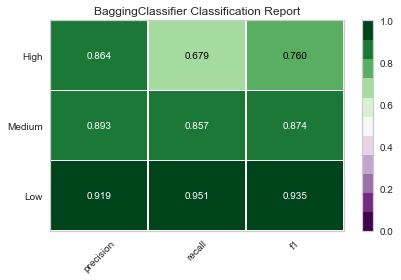

In [28]:
visual_model_selection(X, y, BaggingClassifier())

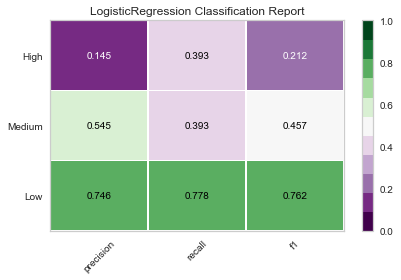

In [29]:
visual_model_selection(X, y, LogisticRegression(class_weight='balanced'))

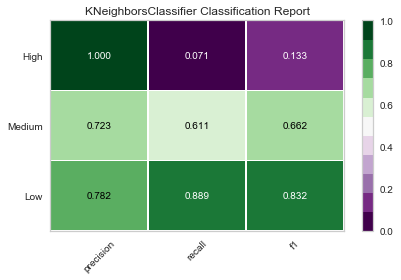

In [30]:
visual_model_selection(X, y, KNeighborsClassifier())

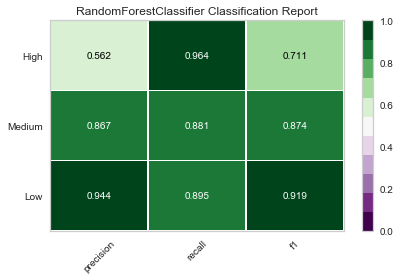

In [31]:
visual_model_selection(X, y, RandomForestClassifier(class_weight='balanced'))

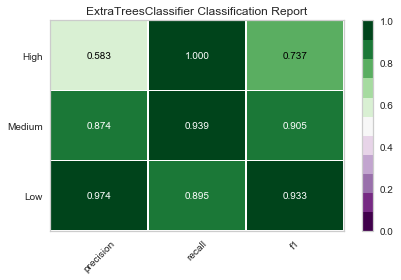

In [32]:
visual_model_selection(X, y, ExtraTreesClassifier(class_weight='balanced'))

For the purposes of this exercise we will consider F1 score when estimating models' performance and making a selection. All of the above models visualized through Yellowbrick's Classification Report Visualizer make clear that classifier algorithms performed the best. We need to pay special attention to the F1 score for the underrepresented classes, such as "High" and "Medium", as they contained significantly less instances than "Low" class. Therefore, high F1 score for all three classes indicate a very strong performance of the following models: Bagging Classifier, Random Forest Classifier, Extra Trees Classifier.

We will also use Class Prediction Error visualizer for these models to confirm their strong performance.

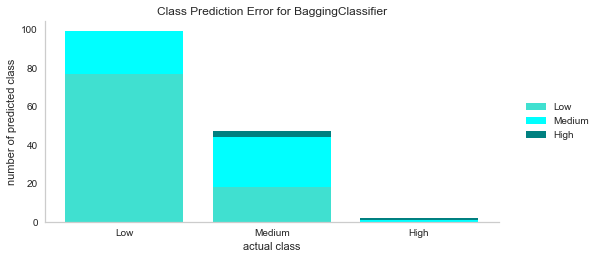

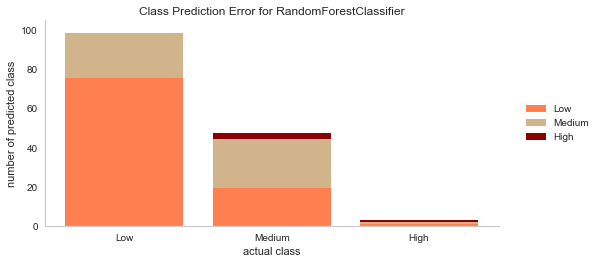

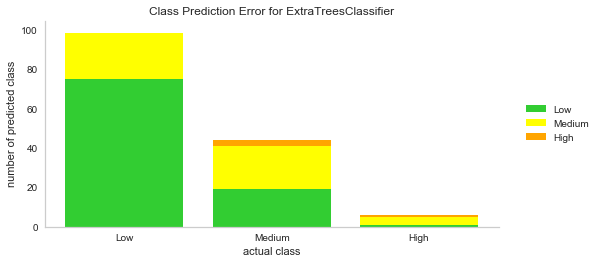

In [33]:
# Visualizaing class prediction error for Bagging Classifier model
classes = ['Low', 'Medium', 'High']

mpl.rcParams['axes.prop_cycle'] = cycler('color', ['turquoise', 'cyan', 'teal', 'coral', 'blue', 'lime', 'lavender', 'lightblue', 'darkgreen', 'tan', 'salmon', 'gold', 'darkred', 'darkblue'])

fig = plt.gcf()
fig.set_size_inches(10,10)
ax = plt.subplot(311)
visualizer = ClassPredictionError(BaggingClassifier(), classes=classes, ax=ax)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(False)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
g = visualizer.show()

# Visualizaing class prediction error for Random Forest Classifier model
classes = ['Low', 'Medium', 'High']

mpl.rcParams['axes.prop_cycle'] = cycler('color', ['coral', 'tan', 'darkred'])

fig = plt.gcf()
fig.set_size_inches(10,10)
ax = plt.subplot(312)
visualizer = ClassPredictionError(RandomForestClassifier(class_weight='balanced'), classes=classes, ax=ax)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(False)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
g = visualizer.show()

# Visualizaing class prediction error for Extra Trees Classifier model
classes = ['Low', 'Medium', 'High']

mpl.rcParams['axes.prop_cycle'] = cycler('color', ['limegreen', 'yellow', 'orange'])

fig = plt.gcf()
fig.set_size_inches(10,10)
ax = plt.subplot(313)
visualizer = ClassPredictionError(ExtraTreesClassifier(class_weight='balanced'), classes=classes, ax=ax)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.grid(False)

visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
g = visualizer.show()

### Model Optimization

Now we can conclude that ExtraTreesClassifier seems to perform better as it had no instances from "High" class reported under the "Low" class.

However, decision trees become more overfit the deeper they are because at each level of the tree the partitions are dealing with a smaller subset of data. One way to avoid overfitting is by adjusting the depth of the tree. Yellowbrick's Validation Curve visualizer explores the relationship of the "max_depth" parameter to the R2 score with 10 shuffle split cross-validation.

So let's proceed with hyperparameter tuning for our selected ExtraTreesClassifier model using Validation Curve visualizer!

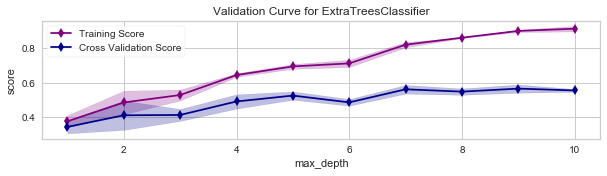

In [37]:
# Performing Hyperparameter tuning 
# Validation Curve
mpl.rcParams['axes.prop_cycle'] = cycler('color', ['purple', 'darkblue'])

fig = plt.gcf()
fig.set_size_inches(10,10)
ax = plt.subplot(411)
viz = ValidationCurve(ExtraTreesClassifier(class_weight='balanced'), ax=ax, param_name="max_depth", param_range=np.arange(1, 11), cv=3, scoring="accuracy")

# Fit and show the visualizer
viz.fit(X, y)
viz.show()

We can observe on the above chart that even though training score keeps rising continuosly, cross validation score drops down at max_depth=7. Therefore, we will chose that parameter for our selected model to optimize its performance.

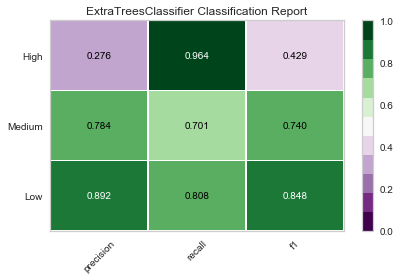

In [38]:
visual_model_selection(X, y, ExtraTreesClassifier(class_weight='balanced', max_depth=7))

### Conclusions

As we demonstrated in this article, visualization techniques prove to be a useful tool in the machine learning toolkit, and Yellowbrick provides a wide selection of visualizers to meet the needs at every step and stage of the data science project pipeline. Ranging from feature analysis and selection, to model selection and optimization, Yellowbrick visualizers make it easy to make a decision as to which features to keep in the model, which model performs best, and how to tune model's hyperparameters to achieve its optimal performance for future use. Moreover, visualizing algorithmic output also makes it easy to present insights to the audience and stakeholders, and contribute to the simplified interpretability of the machine learning results.